In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df = pd.read_csv("retail_sales_data_100_entries.csv")

In [3]:
df

,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,QuantityOrdered,UnitPrice,TotalPrice,Discount,TaxAmount,ShippingCost,OrderStatus,PaymentMethod,Country,ShippingDate,Profit
0,10001,2023-05-09,179,John Doe,242,T-Shirt,Home Appliances,3,362.67,2718.47,12.17,191.75,9.65,Pending,Debit Card,Canada,NaN,286.99
1,10002,2024-09-03,143,Jane Smith,211,Smartphone,Home Appliances,2,893.24,4872.58,46.10,57.93,6.22,Pending,Credit Card,UK,NaN,454.70
2,10003,2024-02-13,179,Jane Smith,294,T-Shirt,Apparel,1,1333.95,2116.97,0.47,180.54,0.73,Cancelled,Bank Transfer,USA,2023-07-30,444.58
3,10004,2023-05-21,168,Alice White,283,T-Shirt,Books,1,377.34,703.73,23.72,88.27,23.64,Cancelled,Credit Card,India,NaN,281.62
4,10005,2023-02-01,185,Alice White,256,Tablet,Books,2,1171.30,1568.99,25.37,82.03,11.57,Pending,Debit Card,USA,2023-01-27,234.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10096,2023-05-19,132,Emily Davis,287,Laptop,Books,3,1100.03,2100.18,45.77,160.22,29.35,Cancelled,PayPal,USA,2024-03-28,334.96
96,10097,2023-03-30,152,Emily Davis,204,Laptop,Electronics,5,560.92,1443.84,37.57,18.09,1.61,Pending,PayPal,UK,2023-03-11,415.31
97,10098,2024-08-31,190,Michael Brown,232,Tablet,Home Appliances,4,1265.51,3703.21,38.68,41.83,3.75,Pending,Debit Card,Canada,2024-09-26,447.38
98,10099,2023-02-11,164,Jane Smith,257,Smartphone,Accessories,3,783.80,2502.75,1.13,177.72,3.26,Delivered,Cash,UK,NaN,298.38


In [4]:
# Handle missing values (fill with mode or mean, or drop depending on the scenario)

In [5]:
df['ShippingDate'] = df['ShippingDate'].fillna(df['ShippingDate'].mode()[0])

In [9]:
df.head()

,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,QuantityOrdered,UnitPrice,TotalPrice,Discount,TaxAmount,ShippingCost,OrderStatus,PaymentMethod,Country,ShippingDate,Profit
0,10001,2023-05-09,179,John Doe,242,3,Home Appliances,3,362.67,2718.47,12.17,191.75,9.65,2,3,0,2023-07-28,286.99
1,10002,2024-09-03,143,Jane Smith,211,2,Home Appliances,2,893.24,4872.58,46.10,57.93,6.22,2,2,3,2023-07-28,454.70
2,10003,2024-02-13,179,Jane Smith,294,3,Apparel,1,1333.95,2116.97,0.47,180.54,0.73,0,0,4,2023-07-30,444.58
3,10004,2023-05-21,168,Alice White,283,3,Books,1,377.34,703.73,23.72,88.27,23.64,0,2,2,2023-07-28,281.62
4,10005,2023-02-01,185,Alice White,256,4,Books,2,1171.30,1568.99,25.37,82.03,11.57,2,3,4,2023-01-27,234.94


In [7]:
# Encode categorical variables using LabelEncoder

In [8]:
label_encoder = LabelEncoder()
df['OrderStatus'] = label_encoder.fit_transform(df['OrderStatus'])
df['PaymentMethod'] = label_encoder.fit_transform(df['PaymentMethod'])
df['Country'] = label_encoder.fit_transform(df['Country'])
df['ProductName'] = label_encoder.fit_transform(df['ProductName'])

In [10]:
# Feature Engineering: Adding new features

In [11]:
df['OrderCompletionTime'] = (pd.to_datetime(df['ShippingDate']) - pd.to_datetime(df['OrderDate'])).dt.days
df['DiscountedPrice'] = df['TotalPrice'] - df['Discount']
df['ProfitMargin'] = df['Profit'] / df['TotalPrice']

In [16]:
# Normalizing/Scaling numerical features

In [17]:
scaler = StandardScaler()
numerical_features = ['QuantityOrdered', 'TotalPrice', 'Discount', 'TaxAmount', 'ShippingCost', 'Profit', 'OrderCompletionTime']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [18]:
#Predicting Order Status (Classification Problem)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [20]:
# Features and target variable
X = df[['QuantityOrdered', 'TotalPrice', 'Discount', 'TaxAmount', 'ShippingCost', 'OrderCompletionTime', 'PaymentMethod', 'Country', 'ProductName']]
y = df['OrderStatus']

In [21]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Predictions and evaluation
y_pred = rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")

Accuracy: 0.36666666666666664
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.50      0.48        12
           1       0.30      0.43      0.35         7
           2       0.29      0.18      0.22        11

    accuracy                           0.37        30
   macro avg       0.35      0.37      0.35        30
weighted avg       0.36      0.37      0.36        30



In [24]:
#Customer Segmentation (Clustering)

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [26]:
# Features for clustering
X_cluster = df[['TotalPrice', 'QuantityOrdered', 'Profit', 'Country', 'PaymentMethod']]

In [27]:
# K-Means Clustering (elbow method to find the best k)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_cluster)
    wcss.append(kmeans.inertia_)

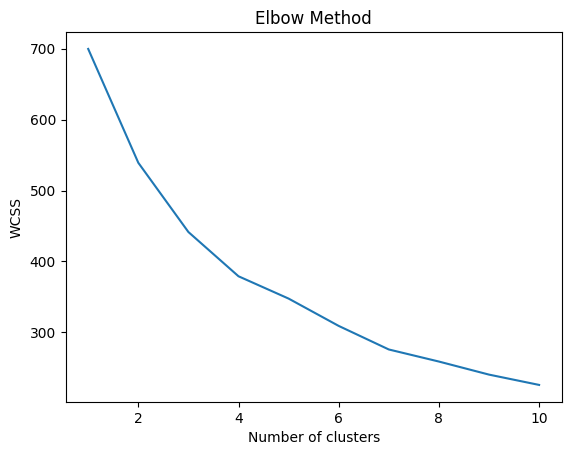

In [28]:
# Plotting the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [29]:
# Training the model with the optimal number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_cluster)

In [30]:
# Adding the cluster label to the dataframe
df['CustomerSegment'] = clusters

In [31]:
#Sales Forecasting (Time Series Analysis)

In [36]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [37]:
# Prepare data for Prophet (ensure OrderDate is datetime)
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
sales_data = df.groupby('OrderDate')['TotalPrice'].sum().reset_index()
sales_data.columns = ['ds', 'y']

In [38]:
# Train a Prophet model for sales forecasting
model = Prophet()
model.fit(sales_data)

18:15:20 - cmdstanpy - INFO - Chain [1] start processing
18:15:20 - cmdstanpy - INFO - Chain [1] done processing


In [39]:
# Future prediction (next 30 days)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

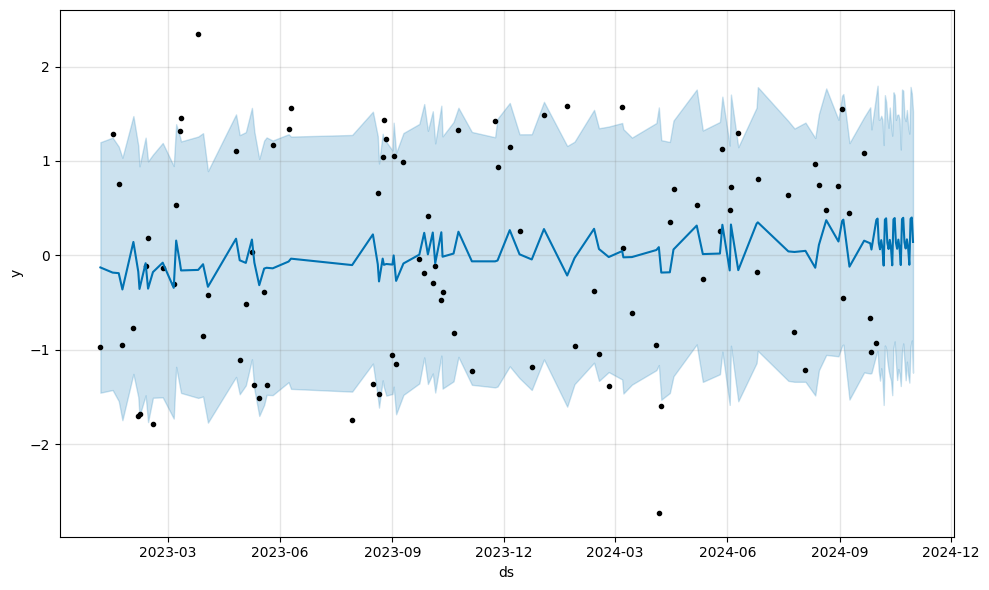

In [40]:
# Plotting the forecast
model.plot(forecast)
plt.show()

In [41]:
#Profit Prediction (Regression Problem)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
# Features and target variable for regression
X_reg = df[['QuantityOrdered', 'TotalPrice', 'Discount', 'TaxAmount', 'ShippingCost']]
y_reg = df['Profit']

In [44]:
# Splitting data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

In [45]:
# Linear Regression Model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_reg, y_train_reg)

LinearRegression()

In [46]:
# Predictions and evaluation
y_pred_reg = lin_reg_model.predict(X_test_reg)
print(f"Mean Squared Error: {mean_squared_error(y_test_reg, y_pred_reg)}")
print(f"R-Squared: {r2_score(y_test_reg, y_pred_reg)}")

Mean Squared Error: 1.0256263362636289
R-Squared: 0.036270941634355736


In [47]:
# Insights Extraction (Using Grouping and Aggregations)

In [48]:
#1.Top Performing Products

In [49]:
# Group by ProductName and calculate total sales and profit
product_performance = df.groupby('ProductName')[['TotalPrice', 'Profit']].sum().reset_index()

In [50]:
# Sort by Total Sales
top_products = product_performance.sort_values(by='TotalPrice', ascending=False)
print(top_products.head(10))

   ProductName  TotalPrice    Profit
4            4    5.393031  4.841261
3            3    1.805048  0.540479
1            1    0.211563  6.437749
0            0   -0.331613 -6.699663
2            2   -7.078028 -5.119825


In [51]:
#2.Customer Behavior Analysis

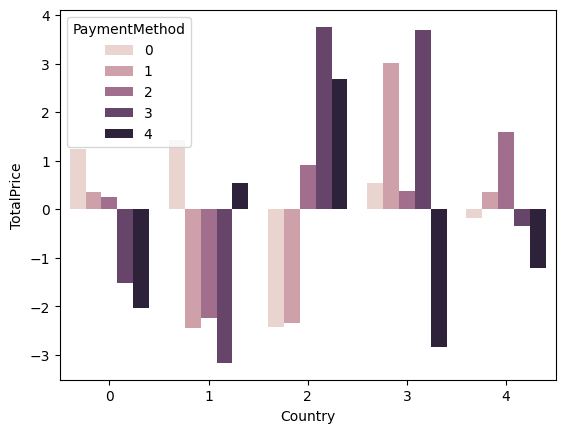

In [52]:
# Group by Country and PaymentMethod to analyze customer behavior
customer_behavior = df.groupby(['Country', 'PaymentMethod'])[['TotalPrice', 'QuantityOrdered']].sum().reset_index()

# Visualize using bar plots (Matplotlib or Seaborn)
import seaborn as sns
sns.barplot(x='Country', y='TotalPrice', hue='PaymentMethod', data=customer_behavior)
plt.show()

In [53]:
#3.Seasonal Trends in Sales

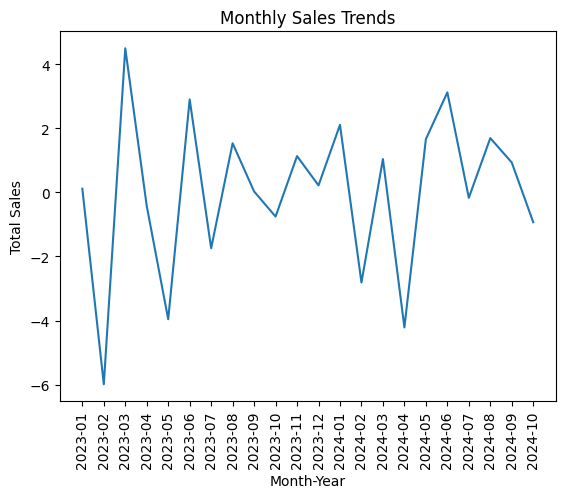

In [54]:
# Group by OrderDate to analyze monthly sales
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['MonthYear'] = df['OrderDate'].dt.to_period('M')

monthly_sales = df.groupby('MonthYear')['TotalPrice'].sum().reset_index()

# Plot sales trends over time
plt.plot(monthly_sales['MonthYear'].astype(str), monthly_sales['TotalPrice'])
plt.title('Monthly Sales Trends')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#This code covers the full process, from data preprocessing to building machine learning models and retrieving valuable insights from the dataset. You can run these steps in Python, and tweak the models or add more visualizations based on your needs.